In [2]:
import tweepy
import webbrowser
import time
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [3]:
consumer_key = 'XcHoDARQgtfQ4u57uLXiKWXFH'
consumer_secret = 'ummL8WhMjEICkczTvRyVWyHncn17gRKYYVg58RqrWghEBL8vUf'
access_token = '1314430636422311942-kEmUXJTRO1NL7grgrN20sznBuS8BRc'
access_secret = 'wIu2vHMNqkd6niNjJ2y9Rio1a0WImkfK1Gu4D3Xux9hne'

In [4]:
#create authentication object
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)

#set the access token and secret token 
authenticate.set_access_token(access_token, access_secret)

#create api object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [38]:
#extract 100 tweets from twitter user

posts = api.user_timeline(screen_name = 'MichelleObama', count=20, lang='en', tweet_mode='extended')

#print last 5 tweets from account
print("show 20 recent tweets: \n")
i=1
for tweet in posts[0:20]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i = i+1

Unexpected parameter: lang


show 20 recent tweets: 

1) So, I’d love to hear from you today! Reply and share your own #IAmBecoming story, and let me know what you've discovered about yourself. I can’t wait to hear from you! 💕

2) I can't believe it’s been three years since Becoming was released! I’m grateful for every person who read my memoir and shared their own #IAmBecoming story with me—whether it was in person on the book tour or here on social media. I’ve loved hearing you reflect on your journeys. https://t.co/fMb5SRHw7l

3) Today and every day, I could not be more grateful for the extraordinary service and commitment of our nation’s troops, veterans, and their families. I hope we all can find a way to give back to all those who have given us so much. #VeteransDay https://t.co/vLPjkaPGBV

4) Happy #CelebrateFirstGen Day! I’m so proud of all the students working to get their education. I know it can be hard, but just remember: You are never alone. So many of us are out here rooting you on — and that include

In [39]:
#put these into a dataframe
df = pd.DataFrame( [tweet.full_text for tweet in posts] , columns=['Tweets'])

print(df.head(10))

                                              Tweets
0  So, I’d love to hear from you today! Reply and...
1  I can't believe it’s been three years since Be...
2  Today and every day, I could not be more grate...
3  Happy #CelebrateFirstGen Day! I’m so proud of ...
4  You absolutely nailed it – she looks just like...
5  I love this! This is exactly why we created Ad...
6  RT @WhenWeAllVote: Haven’t voted yet? There's ...
7  Vote in-person or drop off your ballot by the ...
8  Today is Election Day! From city hall and the ...
9  Barack and I always loved celebrating Hallowee...


In [40]:
#clean the text
#create a function that cleans up the tweets

def clean_text(text):
    text= re.sub(r'@[A-Za-z0-9]+', '', text) #removes @mentions
    text = re.sub(r'#','', text) #removes the # symbol
    text = re.sub(r'RT[\s]+','', text) #removes RT
    text = re.sub(r'https?:\/\/\S+','', text) #removes hyperlink
    
    return text

df['Tweets'] = df['Tweets'].apply(clean_text)
print(df)

                                               Tweets
0   So, I’d love to hear from you today! Reply and...
1   I can't believe it’s been three years since Be...
2   Today and every day, I could not be more grate...
3   Happy CelebrateFirstGen Day! I’m so proud of a...
4   You absolutely nailed it – she looks just like...
5   I love this! This is exactly why we created Ad...
6   : Haven’t voted yet? There's still time! Find ...
7   Vote in-person or drop off your ballot by the ...
8   Today is Election Day! From city hall and the ...
9   Barack and I always loved celebrating Hallowee...
10  I’ve long been a fan of ’s wit and all-around ...
11  I’m so encouraged that the  and  have issued t...
12  So this can’t be the end of our fight. We’re g...
13  And right now, their goal is to discourage us....
14  This week, Senate Republicans voted against ev...
15  Congrats, ! So proud of this team for winning ...
16  Happy birthday to a thoughtful, compassionate,...
17  I'm proud of all the stu

In [47]:
#create a function to get subjectivity and polarities

#subjectivity - how opinionated the text is
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
                    
#create a function to get polarity, how positive or negative the text is
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

#create two new columns
df['Subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['Polarity'] = df['Tweets'].apply(get_polarity)

#show df
print(df)

                                               Tweets  Subjectivity  Polarity  \
0   So, I’d love to hear from you today! Reply and...      0.800000  0.687500   
1   I can't believe it’s been three years since Be...      0.679167  0.473958   
2   Today and every day, I could not be more grate...      0.425000  0.258333   
3   Happy CelebrateFirstGen Day! I’m so proud of a...      0.758333  0.601667   
4   You absolutely nailed it – she looks just like...      0.900000  0.250000   
5   I love this! This is exactly why we created Ad...      0.528571  0.417857   
6   : Haven’t voted yet? There's still time! Find ...      0.000000  0.000000   
7   Vote in-person or drop off your ballot by the ...      0.000000  0.000000   
8   Today is Election Day! From city hall and the ...      0.629630  0.236111   
9   Barack and I always loved celebrating Hallowee...      0.266667  0.233333   
10  I’ve long been a fan of ’s wit and all-around ...      0.433333  0.050000   
11  I’m so encouraged that t

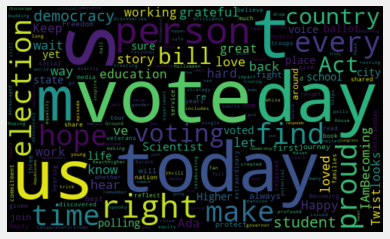

In [48]:
#plot Word Cloud
all_words = ' '.join( [twts for twts in df['Tweets']] )
word_cloud = WordCloud(width = 500, height=300, random_state = 2, max_font_size = 119).generate(all_words)

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [49]:
def get_analysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
    
#create new column for analysis    
df['Analysis'] = df['Polarity'].apply(get_analysis)

#show
print(df)



                                               Tweets  Subjectivity  Polarity  \
0   So, I’d love to hear from you today! Reply and...      0.800000  0.687500   
1   I can't believe it’s been three years since Be...      0.679167  0.473958   
2   Today and every day, I could not be more grate...      0.425000  0.258333   
3   Happy CelebrateFirstGen Day! I’m so proud of a...      0.758333  0.601667   
4   You absolutely nailed it – she looks just like...      0.900000  0.250000   
5   I love this! This is exactly why we created Ad...      0.528571  0.417857   
6   : Haven’t voted yet? There's still time! Find ...      0.000000  0.000000   
7   Vote in-person or drop off your ballot by the ...      0.000000  0.000000   
8   Today is Election Day! From city hall and the ...      0.629630  0.236111   
9   Barack and I always loved celebrating Hallowee...      0.266667  0.233333   
10  I’ve long been a fan of ’s wit and all-around ...      0.433333  0.050000   
11  I’m so encouraged that t

In [51]:
#print only the positive tweets
j=1
sorted_df = df.sort_values(by=['Polarity'])
for i in range(0, sorted_df.shape[0]):
    if (sorted_df['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sorted_df['Tweets'][i])
        print()
        j=j+1

1) So, I’d love to hear from you today! Reply and share your own IAmBecoming story, and let me know what you've discovered about yourself. I can’t wait to hear from you! 💕

2) I can't believe it’s been three years since Becoming was released! I’m grateful for every person who read my memoir and shared their own IAmBecoming story with me—whether it was in person on the book tour or here on social media. I’ve loved hearing you reflect on your journeys. 

3) Today and every day, I could not be more grateful for the extraordinary service and commitment of our nation’s troops, veterans, and their families. I hope we all can find a way to give back to all those who have given us so much. VeteransDay 

4) Happy CelebrateFirstGen Day! I’m so proud of all the students working to get their education. I know it can be hard, but just remember: You are never alone. So many of us are out here rooting you on — and that includes me. Keep up the great work! ReachHigher 

5) You absolutely nailed it – s

In [52]:
#print only negative tweets 
j=1
sorted_df = df.sort_values(by=['Polarity'])
for i in range(0, sorted_df.shape[0]):
    if (sorted_df['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sorted_df['Tweets'][i])
        print()
        j=j+1

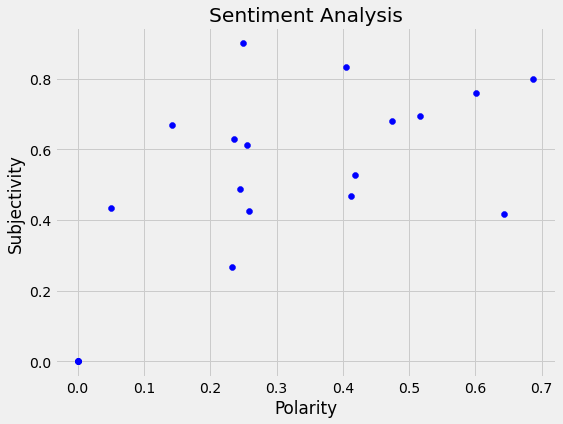

In [53]:
#plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='blue' )
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()